In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('aluguel.csv', delimiter=';')

In [4]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [5]:
df_ap = df.query("Tipo == 'Apartamento'")
df_ap

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [6]:
# Média de quartos por apartamento
df_ap["Quartos"].mean()

2.481568707761622

In [7]:
# Bairros único na base de dados
df_ap.Bairro.value_counts().unique()

array([3341, 2465, 1768, 1490, 1241, 1059,  788,  647,  487,  397,  389,
        319,  277,  234,  233,  226,  223,  210,  204,  184,  180,  149,
        136,  131,  130,  117,   98,   92,   87,   77,   76,   75,   68,
         64,   62,   57,   56,   47,   41,   40,   36,   35,   32,   28,
         27,   26,   24,   23,   22,   21,   20,   19,   18,   16,   15,
         13,   12,   11,   10,    9,    8,    7,    6,    5,    4,    3,
          2,    1])

In [8]:
# Quais bairros possuem a média de valor de alguel mais elevada
df_ap.groupby("Bairro")[['Valor']].mean().sort_values('Valor', ascending=False)

,Valor
Bairro,
Joá,15500.000000
Arpoador,12429.769231
Cidade Jardim,12000.000000
Ipanema,9487.205317
Botafogo,9369.207116
...,...
Inhoaíba,650.000000
Cosmos,610.000000
Santa Cruz,590.000000


<Axes: xlabel='Bairro', ylabel='Valor'>

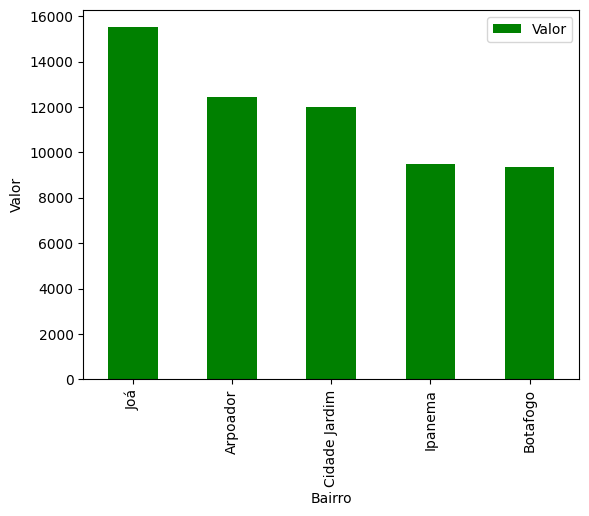

In [9]:
bairros_elevados = df_ap.groupby("Bairro")[['Valor']].mean().sort_values('Valor', ascending=False)
bairros_elevados.head(5).plot(kind="bar", color="green", xlabel="Bairro", ylabel="Valor")